In [ ]:
import os
import pandas as pd

# Replace with the path to your local dataset folder
base_path = "/home/prajjwal/TweetVision-Analyzer/Test_data-20250726T090636Z-1-001/Test_data"

# Dictionary to hold combined data for each crop
all_crop_data = {}

# Loop through each crop folder
for crop_folder in os.listdir(base_path):
    if crop_folder.startswith('.'):
        continue  # Skip hidden/system files
    
    crop_path = os.path.join(base_path, crop_folder)
    
    if not os.path.isdir(crop_path):
        continue

    crop_dfs = []

    for file in os.listdir(crop_path):
        if file.startswith('.'):
            continue  # Skip hidden/system files

        file_path = os.path.join(crop_path, file)

        try:
            # Try reading as Excel
            df = pd.read_excel(file_path)
        except Exception:
            try:
                # Try reading as CSV if Excel fails
                df = pd.read_csv(file_path)
            except Exception as e:
                print(f"❌ Skipped {file_path} – Error: {e}")
                continue
        
        # Attempt to parse 'year' column as index
        if 'year' in df.columns:
            df = df.set_index('year')
        
        crop_dfs.append(df)

    # Combine all years for the crop into one DataFrame
    if crop_dfs:
        all_crop_data[crop_folder] = pd.concat(crop_dfs)
        print(f"Loaded '{crop_folder}' → Shape: {all_crop_data[crop_folder].shape}")
    else:
        print(f"No valid data files found for: {crop_folder}")

# ✅ all_crop_data now contains one DataFrame per crop


In [14]:


# View Bhindi data
bhindi_df = all_crop_data.get('Bajra')



In [15]:
bhindi_df

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Grade,Date
0,Andhra Pradesh,Prakasam,Kanigiri,Bold,Cereals,0.1,1280.0,1300.0,1290.0,01 Jan 2016,Medium,01-Jan-2016
1,Andhra Pradesh,Prakasam,Podili,Bold,Cereals,0.1,1400.0,1500.0,1450.0,01 Jan 2016,Medium,01-Jan-2016
2,Gujarat,Amreli,Amreli,Other,Cereals,2.4,1280.0,1725.0,1645.0,01 Jan 2016,FAQ,01-Jan-2016
3,Gujarat,Amreli,Rajula,Other,Cereals,1.6,1410.0,3655.0,2533.0,01 Jan 2016,FAQ,01-Jan-2016
4,Gujarat,Amreli,Savarkundla,Other,Cereals,0.6,1350.0,1625.0,1488.0,01 Jan 2016,FAQ,01-Jan-2016
...,...,...,...,...,...,...,...,...,...,...,...,...
36317,Uttar Pradesh,Etawah,Jasvantnagar,Other,Cereals,23.4,700.0,770.0,760.0,31 Dec 2010,FAQ,31-Dec-2010
36318,Uttar Pradesh,Fatehpur,Kishunpur,Hybrid,Cereals,16.0,0.0,0.0,865.0,31 Dec 2010,FAQ,31-Dec-2010
36319,Uttar Pradesh,Kasganj,Kasganj,Other,Cereals,167.5,705.0,715.0,710.0,31 Dec 2010,FAQ,31-Dec-2010
36320,Uttar Pradesh,Sambhal,Bhehjoi,Other,Cereals,55.6,0.0,0.0,890.0,31 Dec 2010,FAQ,31-Dec-2010


Step 1: Crop Price Comparison (2010–2025)
Goal: Average annual modal prices for 6 crops → Identify Top 1 & Bottom 1 → Plot time series.



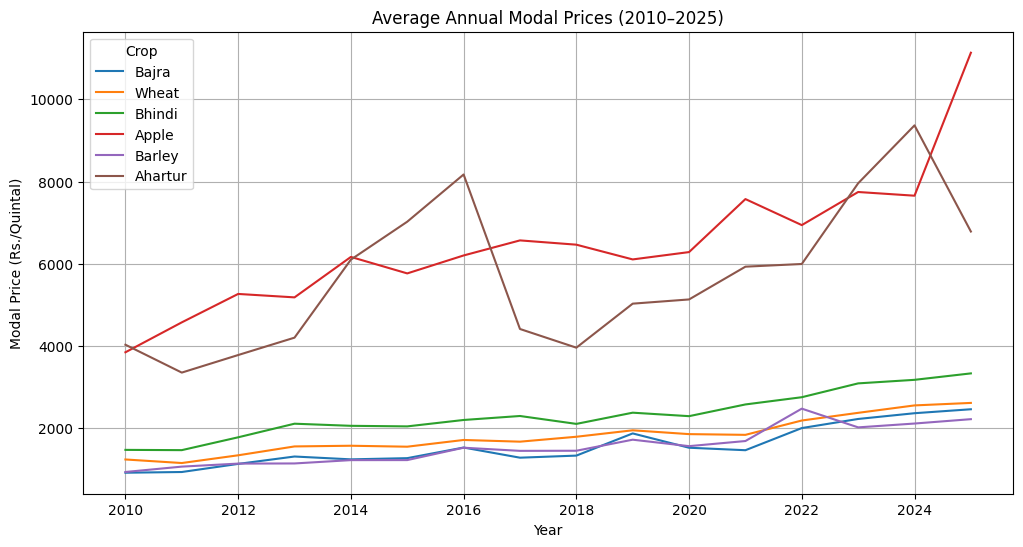

Top crop: Apple (₹6468.32)
Bottom crop: Bajra (₹1558.38)


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# List of crops to compare
selected_crops = ['Bajra', 'Wheat', 'Bhindi', 'Apple', 'Barley', 'Ahartur']
avg_prices = {}

# Loop through selected crops
for crop in selected_crops:
    df = all_crop_data[crop].copy()

    # Convert 'Date' column to datetime and extract year
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['year'] = df['Date'].dt.year

    # Group by year and compute average modal price
    yearly_avg = df.groupby('year')['Modal Price (Rs./Quintal)'].mean()
    avg_prices[crop] = yearly_avg

# Combine average prices into one DataFrame
price_df = pd.DataFrame(avg_prices)

# Plotting the time series
price_df.plot(figsize=(12, 6), title="Average Annual Modal Prices (2010–2025)")
plt.ylabel('Modal Price (Rs./Quintal)')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title="Crop")
plt.show()

# Identify top & bottom crop (based on overall mean modal price)
mean_prices = price_df.mean()
top_crop = mean_prices.idxmax()
bottom_crop = mean_prices.idxmin()

print(f"Top crop: {top_crop} (₹{mean_prices.max():.2f})")
print(f"Bottom crop: {bottom_crop} (₹{mean_prices.min():.2f})")


Step 2: Unique Crop-State Coverage
Goal: Count how many unique states each crop appears in.

In [30]:
crop_state_coverage = {}

for crop, df in all_crop_data.items():
    unique_states = df['State Name'].unique().tolist()
    crop_state_coverage[crop] = {
        'Num Unique States': len(unique_states),
        'Covered States': unique_states
    }

# Convert to DataFrame (one column for count, one for list of states)
coverage_df = pd.DataFrame.from_dict(crop_state_coverage, orient='index')

# Sort by number of states
coverage_df_sorted = coverage_df.sort_values('Num Unique States', ascending=False)

# Display top and bottom coverage crops
print(" Crops with maximum state coverage:")
print(coverage_df_sorted.head(3))

print("\nCrops with minimum state coverage:")
print(coverage_df_sorted.tail(3))


 Crops with maximum state coverage:
        Num Unique States                                     Covered States
Bhindi                 28  [Andhra Pradesh, Gujarat, Haryana, Himachal Pr...
Apple                  27  [Chandigarh, Gujarat, Haryana, Himachal Prades...
Wheat                  23  [Gujarat, Jharkhand, Madhya Pradesh, Maharasht...

Crops with minimum state coverage:
         Num Unique States                                     Covered States
Ahartur                 22  [Andhra Pradesh, Assam, Jharkhand, Karnataka, ...
Bajra                   19  [Andhra Pradesh, Gujarat, Haryana, Karnataka, ...
Barley                  18  [Madhya Pradesh, Rajasthan, Uttar Pradesh, Guj...


Step 3: Price Volatility
Goal: Std deviation of prices → Rank crops → Plot volatility vs. avg price.

In [31]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


 Most Volatile Crops:
      Crop   Volatility  Average Price
4    Apple  6883.009048    6531.089262
0   Bhindi  3425.821048    2469.858262
2  Ahartur  2323.525173    5628.393904

 Least Volatile Crops:
     Crop  Volatility  Average Price
3   Wheat  577.589503    1845.885892
1   Bajra  527.223872    1541.616573
5  Barley  494.442687    1567.137713


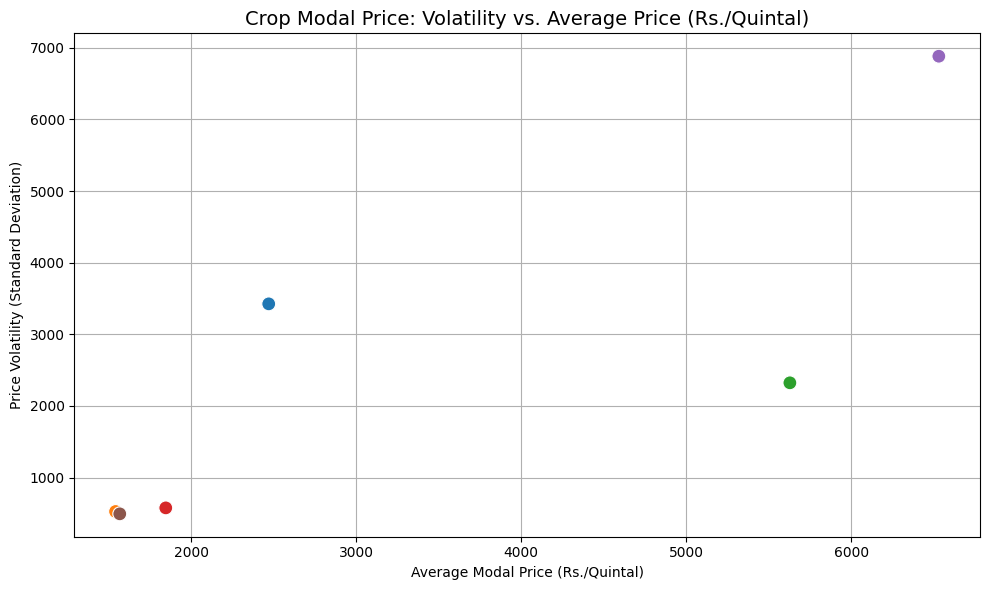

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Store volatility and average price for each crop
price_stats = []

for crop, df in all_crop_data.items():
    # Clean and filter invalid modal prices
    modal_prices = df['Modal Price (Rs./Quintal)']
    modal_prices = modal_prices[modal_prices > 0]  # Remove zero/invalid entries

    if len(modal_prices) >= 10:  # Ensure there's enough data
        volatility = modal_prices.std()
        avg_price = modal_prices.mean()
        price_stats.append({
            'Crop': crop,
            'Volatility': volatility,
            'Average Price': avg_price
        })

# Convert to DataFrame
price_df = pd.DataFrame(price_stats)

# Rank by volatility
price_df_sorted = price_df.sort_values(by='Volatility', ascending=False)

# Display top and bottom volatile crops
print(" Most Volatile Crops:")
print(price_df_sorted.head(3))

print("\n Least Volatile Crops:")
print(price_df_sorted.tail(3))

# 🔍 Plot: Volatility vs Average Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=price_df, x='Average Price', y='Volatility', hue='Crop', s=100, legend=False)
plt.title('Crop Modal Price: Volatility vs. Average Price (Rs./Quintal)', fontsize=14)
plt.xlabel('Average Modal Price (Rs./Quintal)')
plt.ylabel('Price Volatility (Standard Deviation)')
plt.grid(True)
plt.tight_layout()
plt.show()


Step 4: Skewness and Outliers
Goal: Boxplot for one crop (e.g., Bajra), identify extremes.

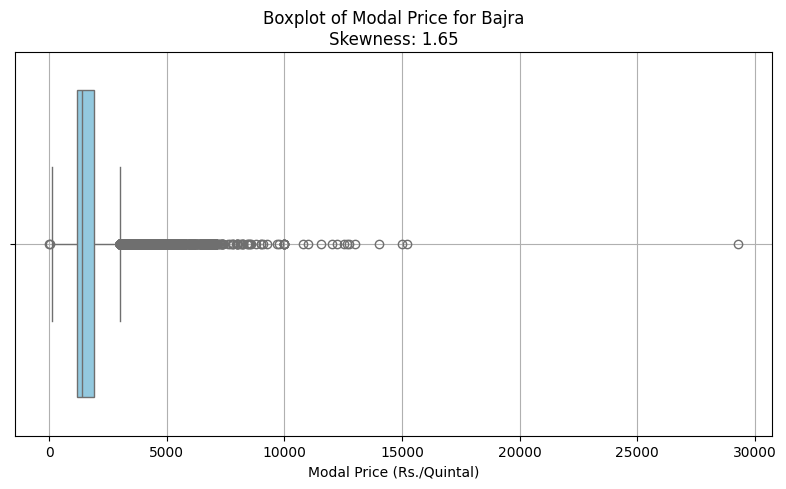

Skewness for Bajra: 1.65
Highly positively skewed (long right tail): Possible high-price outliers or seasonal spikes.


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Choose crop
crop_name = 'Bajra'

# Get the DataFrame
if crop_name in all_crop_data:
    crop_df = all_crop_data[crop_name]

    # Clean model price column
    crop_df = crop_df[crop_df['Modal Price (Rs./Quintal)'] > 0]

    # Calculate skewness
    skew_value = skew(crop_df['Modal Price (Rs./Quintal)'])

    # Plot boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=crop_df['Modal Price (Rs./Quintal)'], color='skyblue')
    plt.title(f'Boxplot of Modal Price for {crop_name}\nSkewness: {skew_value:.2f}')
    plt.xlabel('Modal Price (Rs./Quintal)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"Skewness for {crop_name}: {skew_value:.2f}")
    if skew_value > 1:
        print("Highly positively skewed (long right tail): Possible high-price outliers or seasonal spikes.")
    elif skew_value < -1:
        print("Highly negatively skewed (long left tail): Likely data entry errors or rare low-price drops.")
    elif 0.5 < skew_value <= 1 or -1 <= skew_value < -0.5:
        print("Moderately skewed distribution.")
    else:
        print("Approximately symmetric distribution.")

else:
    print(f"{crop_name} not found in the crop dataset.")


Step 5: Coverage Gaps Across Markets
Goal: Analyze how often each market reports per crop.

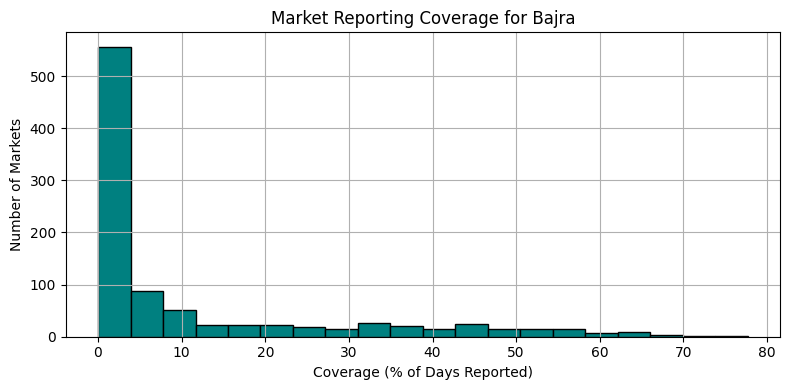


Bajra Coverage Stats:
  Total Markets              : 951
  Consistently Reporting (≥75%): 2
  Sparsely Reporting (≤25%)  : 772


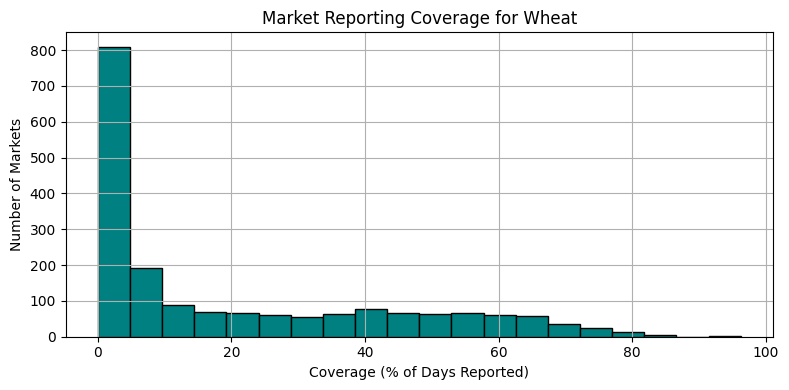


Wheat Coverage Stats:
  Total Markets              : 1875
  Consistently Reporting (≥75%): 27
  Sparsely Reporting (≤25%)  : 1236


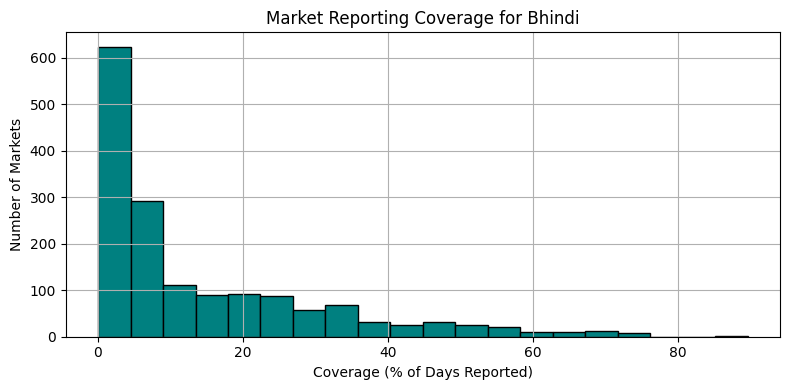


Bhindi Coverage Stats:
  Total Markets              : 1600
  Consistently Reporting (≥75%): 5
  Sparsely Reporting (≤25%)  : 1267


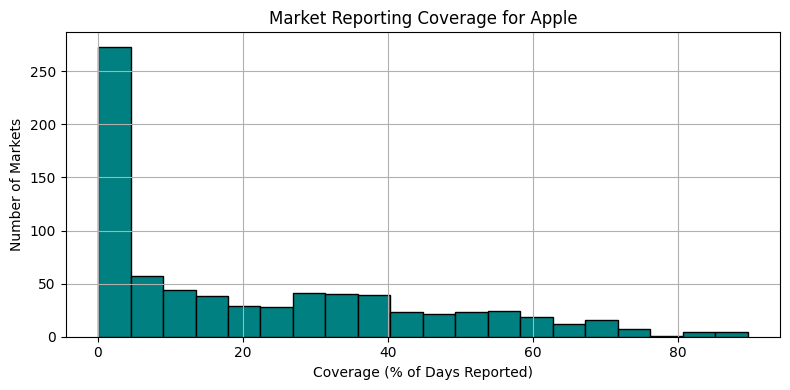


Apple Coverage Stats:
  Total Markets              : 743
  Consistently Reporting (≥75%): 9
  Sparsely Reporting (≤25%)  : 457


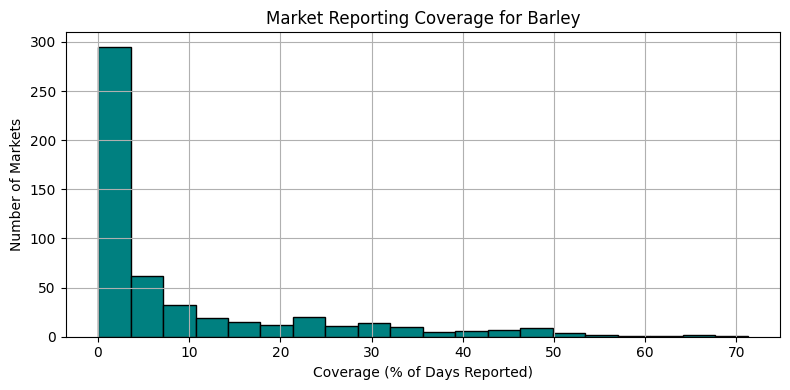


Barley Coverage Stats:
  Total Markets              : 528
  Consistently Reporting (≥75%): 0
  Sparsely Reporting (≤25%)  : 455


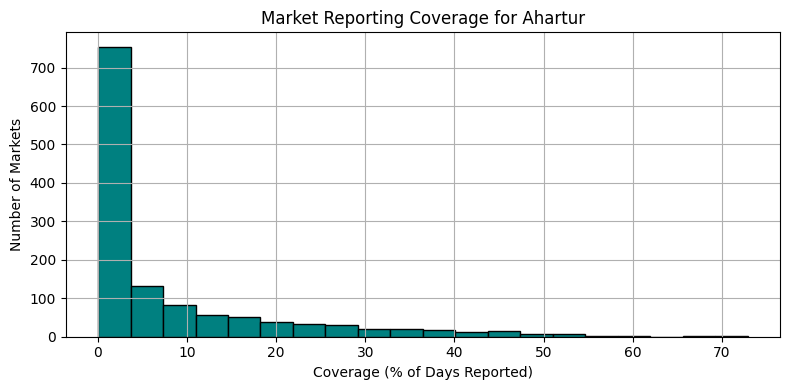


Ahartur Coverage Stats:
  Total Markets              : 1283
  Consistently Reporting (≥75%): 0
  Sparsely Reporting (≤25%)  : 1143


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# List of crops to analyze
selected_crops = ['Bajra', 'Wheat', 'Bhindi', 'Apple', 'Barley', 'Ahartur']

# Loop through each crop
for crop_name in selected_crops:
    if crop_name not in all_crop_data:
        print(f"⚠️ {crop_name} not found in dataset.")
        continue

    df = all_crop_data[crop_name].copy()

    # Drop rows with missing prices or dates
    df = df[df['Modal Price (Rs./Quintal)'].notna()]
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df[df['Date'].notna()]

    if 'Market Name' not in df.columns:
        print(f"⚠️ 'Market Name' column not found in {crop_name}. Skipping.")
        continue

    # Count total distinct reporting days
    total_days = df['Date'].nunique()
    if total_days == 0:
        print(f"⚠️ No valid dates for {crop_name}. Skipping.")
        continue

    # Market reporting coverage (% of total days)
    market_reporting = df.groupby('Market Name')['Date'].nunique()
    market_reporting_percent = (market_reporting / total_days) * 100

    # Plot histogram
    plt.figure(figsize=(8, 4))
    plt.hist(market_reporting_percent, bins=20, color='teal', edgecolor='black')
    plt.title(f"Market Reporting Coverage for {crop_name}")
    plt.xlabel("Coverage (% of Days Reported)")
    plt.ylabel("Number of Markets")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Classify markets
    consistent_markets = market_reporting_percent[market_reporting_percent >= 75]
    sparse_markets = market_reporting_percent[market_reporting_percent <= 25]

    print(f"\n{crop_name} Coverage Stats:")
    print(f"  Total Markets              : {len(market_reporting)}")
    print(f"  Consistently Reporting (≥75%): {len(consistent_markets)}")
    print(f"  Sparsely Reporting (≤25%)  : {len(sparse_markets)}")
